### DISNEY+ EXPLORATORY DATA ANALYSIS

In [4]:
#importing the necessary libraries
import pandas as pd
import numpy as np

#load the dataset
disney_plus_overall = pd.read_csv("/Users/mike/Downloads/disney_plus_titles.csv")

disney_plus_overall.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [5]:
#check how many columns present in the dataset and their values
disney_plus_overall.count()

show_id         1450
type            1450
title           1450
director         977
cast            1260
country         1231
date_added      1447
release_year    1450
rating          1447
duration        1450
listed_in       1450
description     1450
dtype: int64

In [7]:
#assigning a variable to the TV show column
disney_plus_shows = disney_plus_overall[disney_plus_overall['type'] == 'TV Show'] 

In [8]:
#assigning a variable to the Movie column
disney_plus_movies = disney_plus_overall[disney_plus_overall['type'] == 'Movie'] 

In [9]:
#importing necessary libraries for graph plot

import seaborn as sns
import matplotlib.pyplot as plt

### Analysis of Shows Vs Movies

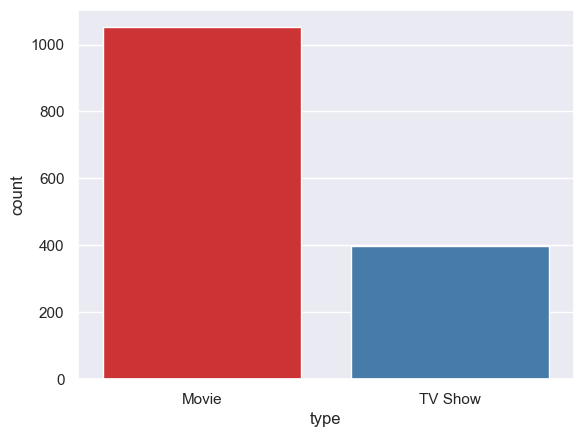

In [16]:
#check the overall count of movies and tv shows in the dataset

sns.set(style="darkgrid")
ax = sns.countplot(x = "type", data = disney_plus_overall, palette="Set1")

findfont: Font family 'timesnewroman' not found.
findfont: Font family 'timesnewroman' not found.
findfont: Font family 'timesnewroman' not found.
findfont: Font family 'timesnewroman' not found.
findfont: Font family 'timesnewroman' not found.


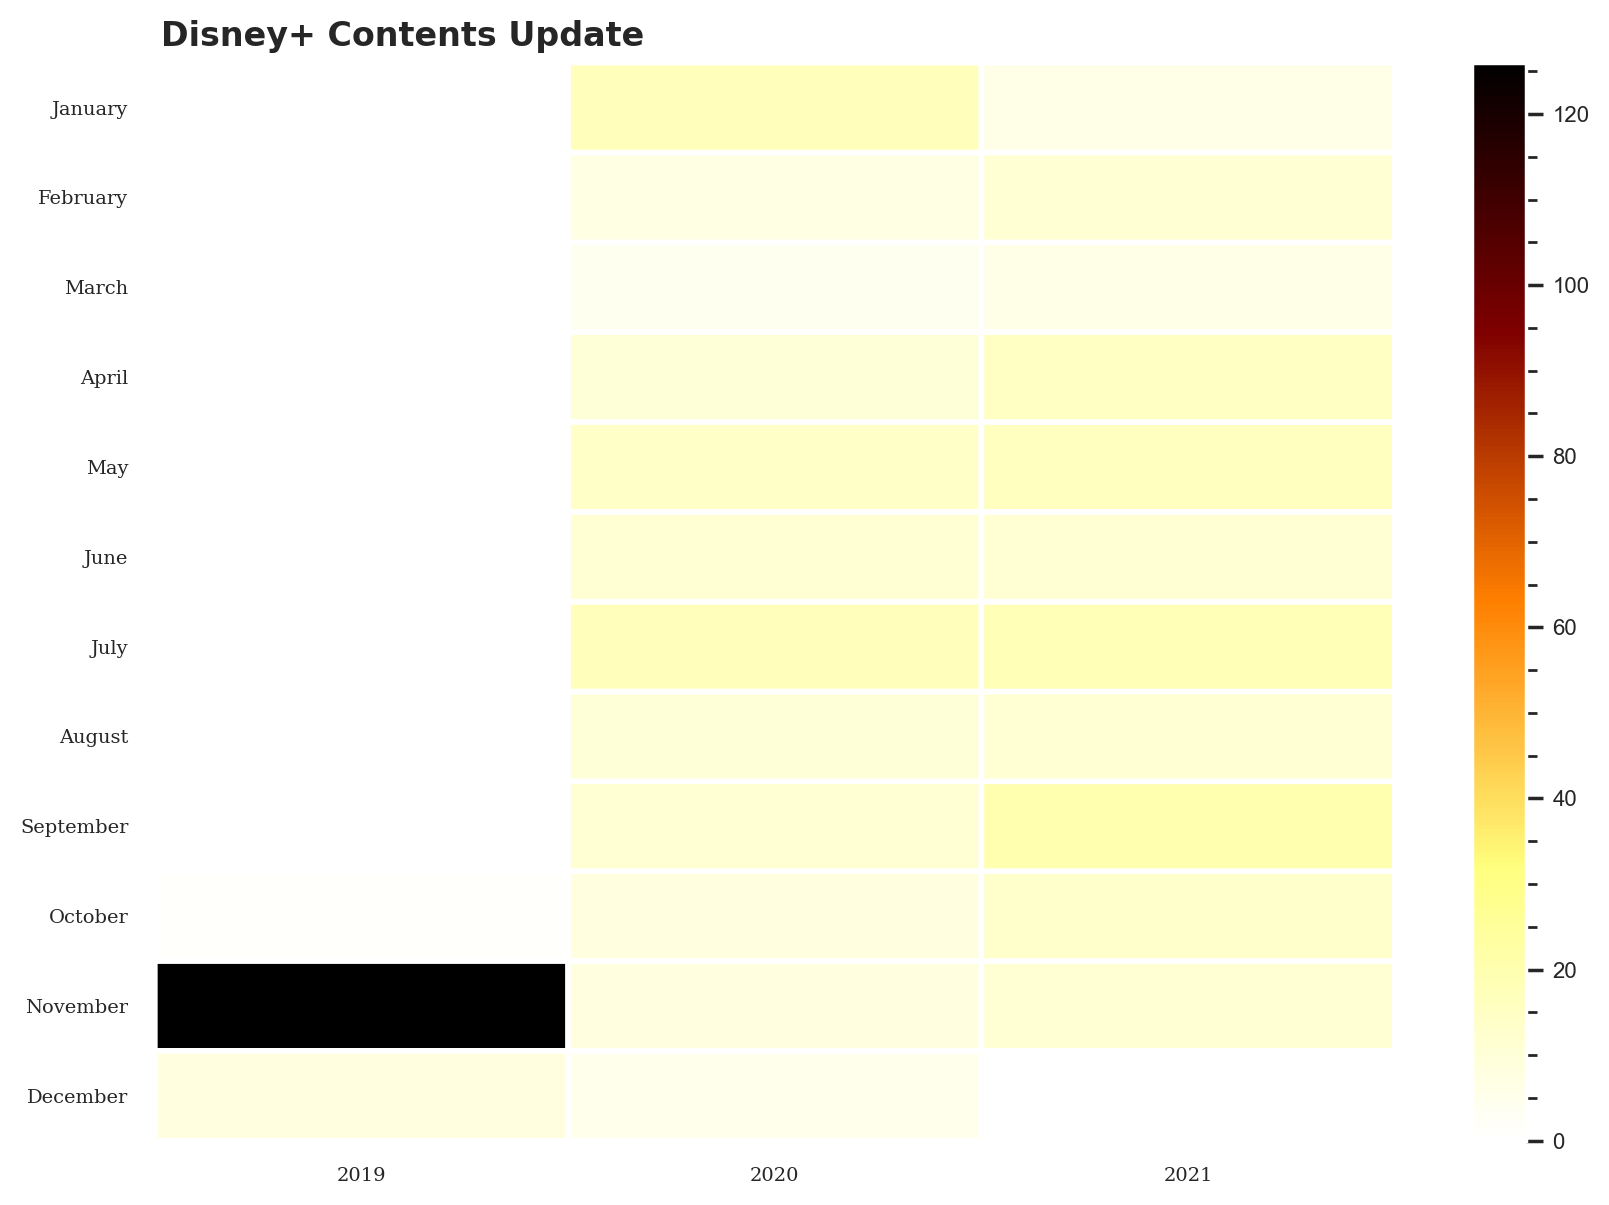

In [18]:
#generate a heatmap to show the months and years content on disney+ are usually uploaded

disney_plus_date = disney_plus_shows[['date_added']].dropna()
disney_plus_date['year'] = disney_plus_date['date_added'].apply(lambda x : x.split(', ')[-1])
disney_plus_date['month'] = disney_plus_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = disney_plus_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Disney+ Contents Update', fontsize = 12, fontfamily = 'calibri', fontweight = 'bold', position = (0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

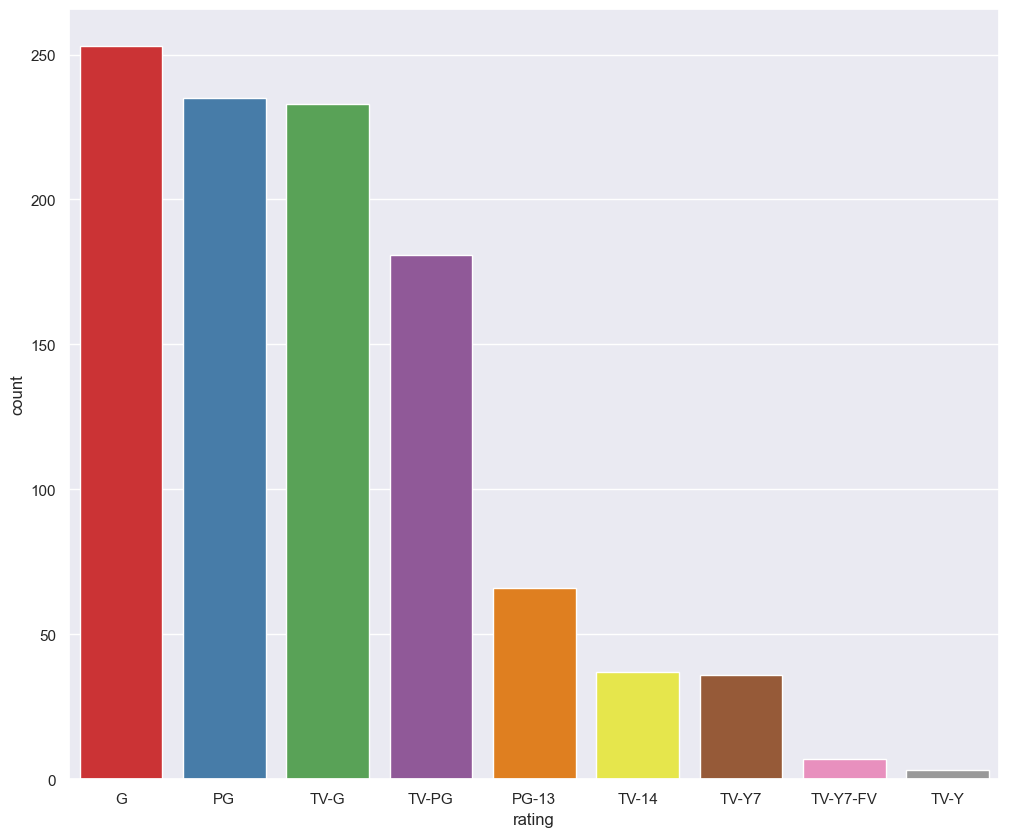

In [19]:
#plot the count of different ratings of movies in our dataset
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data = disney_plus_movies, palette="Set1", order = disney_plus_movies['rating'].value_counts().index[0:15])

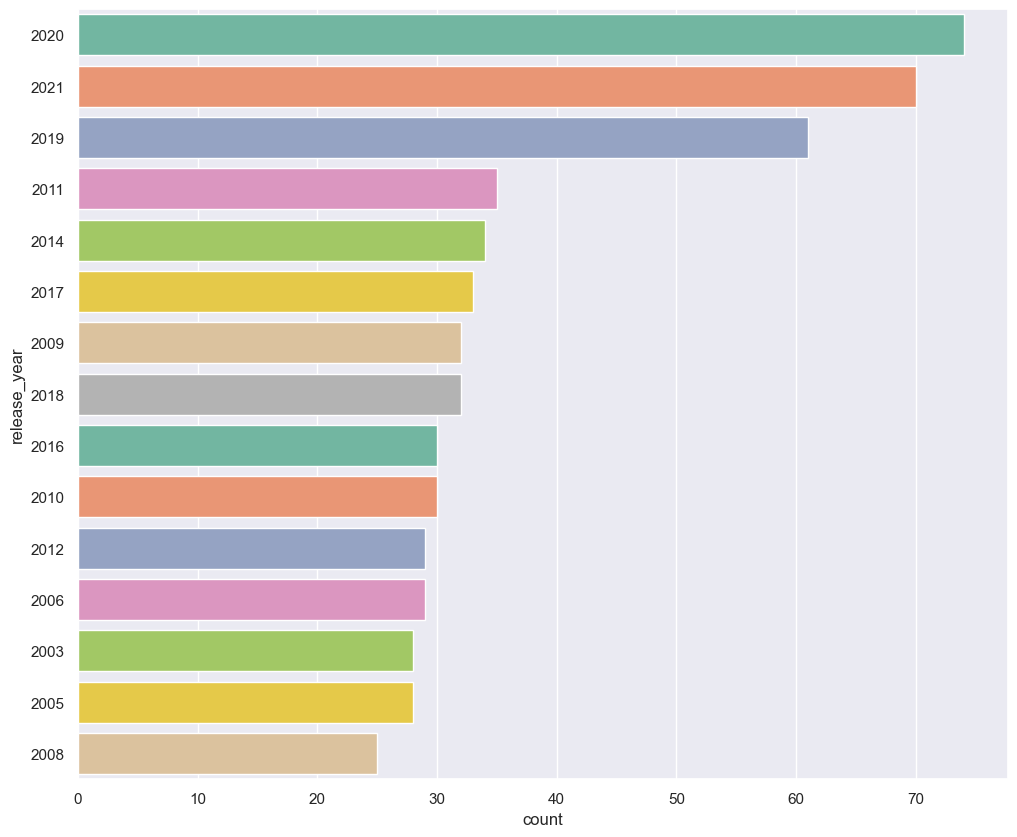

In [20]:
#checking the count of movies released in different years

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data =disney_plus_movies, palette="Set2", order = disney_plus_movies['release_year'].value_counts().index[0:15])

In [23]:
#create a dictionary to count the occurencies of each country in our dataset
countries = {}

# Fill missing values in the 'country' column with 'Unknown'
disney_plus_movies['country'] = disney_plus_movies['country'].fillna('Unknown')

# Iterate over each entry in the 'country' column
c = list(disney_plus_movies['country'])
for i in c:
    #print(i)
    i=list(i.split(','))
    if len(i) == 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

/var/folders/_c/jyhv1n9d7tn_4fvx9lmmjp2c0000gn/T/ipykernel_1425/1325202158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_plus_movies['country'] = disney_plus_movies['country'].fillna('Unknown')


In [24]:
# Initialize the final dictionary to store cleaned country counts
countries_fin = {}
for country,no in countries.items():
    # Remove spaces from the country name
    country = country.replace(' ','')
    # Update the final dictionary with the cleaned country name
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no
# Sort the final dictionary by count in descending order        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

### TOP 10 MOVIE CONTENT CREATING COUNTRIES¶


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


[Text(0, 0, 'Canada'),
 Text(1, 0, 'UnitedStates'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Australia'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Germany'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'Ireland')]

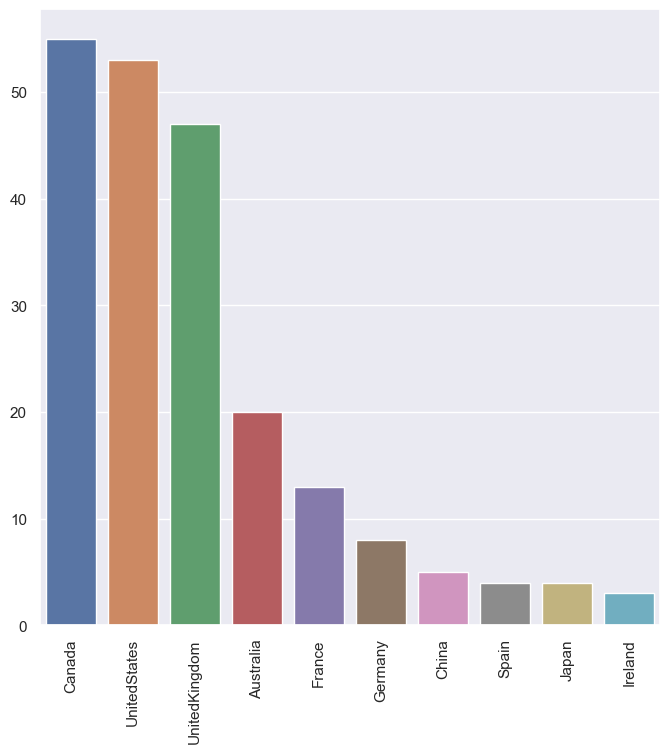

In [25]:
# show the top 10 movie content creating countries
plt.figure(figsize = (8,8))
ax = sns.barplot(x = list(countries_fin.keys())[0:10], y = list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation = 90)

In [27]:
from collections import Counter

# Extract the 'listed_in' column and convert it to a list of genres
genres = list(disney_plus_movies['listed_in'])

# Initialize an empty list to hold all genres
gen = []

# Iterate over each genre entry in the list
for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))

# Use Counter to count occurrences of each genre
g = Counter(gen)

### WordCloud for Genres.


In [30]:
#pip install wordcloud

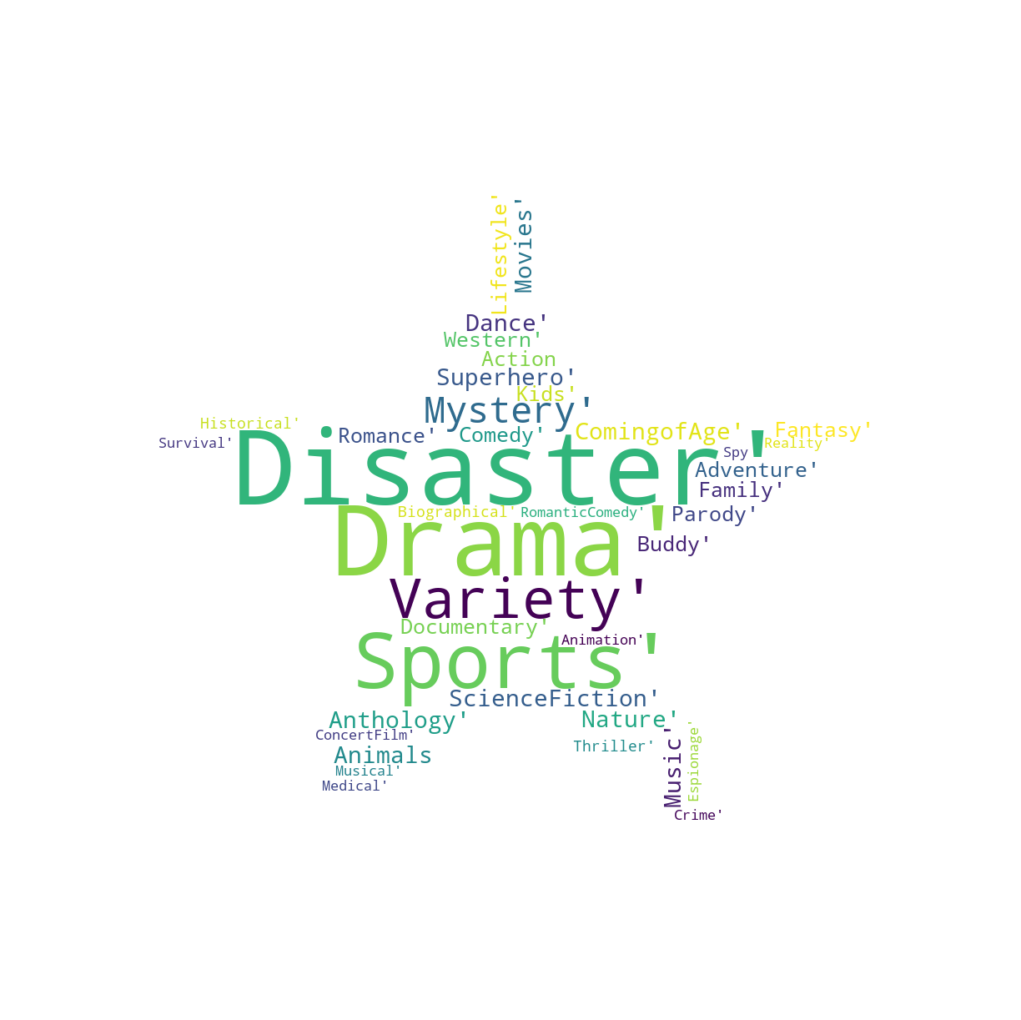

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Convert list to a set to remove duplicates, then back to a string
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

# Load the mask image
mask = np.array(Image.open('/Users/mike/Downloads/star.jpeg'))

# Generate the word cloud
wordcloud = WordCloud(max_words=1000000,background_color="white",mask = mask).generate(str(text))

# Display the word cloud
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### Vertical plot of Genres vs their count on Disney+

/var/folders/_c/jyhv1n9d7tn_4fvx9lmmjp2c0000gn/T/ipykernel_1425/1738992850.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation = 90)


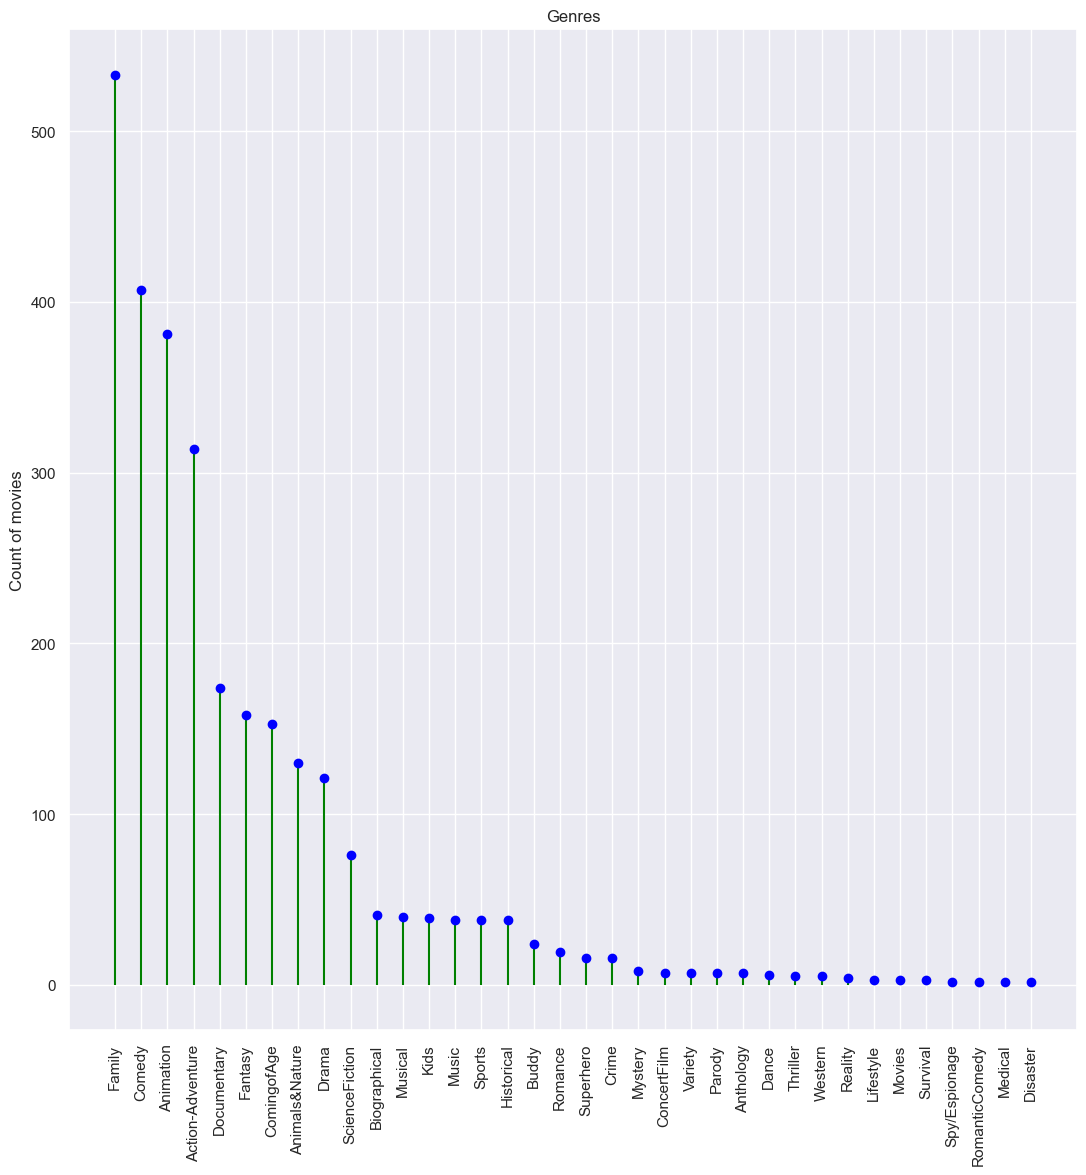

<Figure size 1000x1000 with 0 Axes>

In [35]:
# Sort 'g' by its values in descending order
g = {k: v for k, v in sorted(g.items(), key = lambda item: item[1], reverse = True)}

# Create a figure and axis
fig, ax = plt.subplots()
fig = plt.figure(figsize = (10, 10))

# Extract keys and values for plotting
x = list(g.keys())
y = list(g.values())

# Plot vertical lines and points
ax.vlines(x, ymin = 0, ymax = y, color = 'green')
ax.plot(x,y, "o", color = 'blue')

# Rotate x-axis labels for better readability
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")

# set a title
ax.set_title("Genres");

### Analysis of TV SERIES on Netflix

In [36]:
#create a dictionary to count the occurencies of each country in our dataset
countries1 = {}

# Fill missing values in the 'country' column with 'Unknown'
disney_plus_shows['country'] = disney_plus_shows['country'].fillna('Unknown')
c1 = list(disney_plus_shows['country'])
for i in c1:
    #print(i)
    i = list(i.split(','))
    if len(i) == 1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

/var/folders/_c/jyhv1n9d7tn_4fvx9lmmjp2c0000gn/T/ipykernel_1425/2146525354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_plus_shows['country'] = disney_plus_shows['country'].fillna('Unknown')


In [37]:
# Initialize the final dictionary to store cleaned country counts
countries_fin1={}

for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

### Most content creating countries

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



Text(0.5, 0, 'Count')

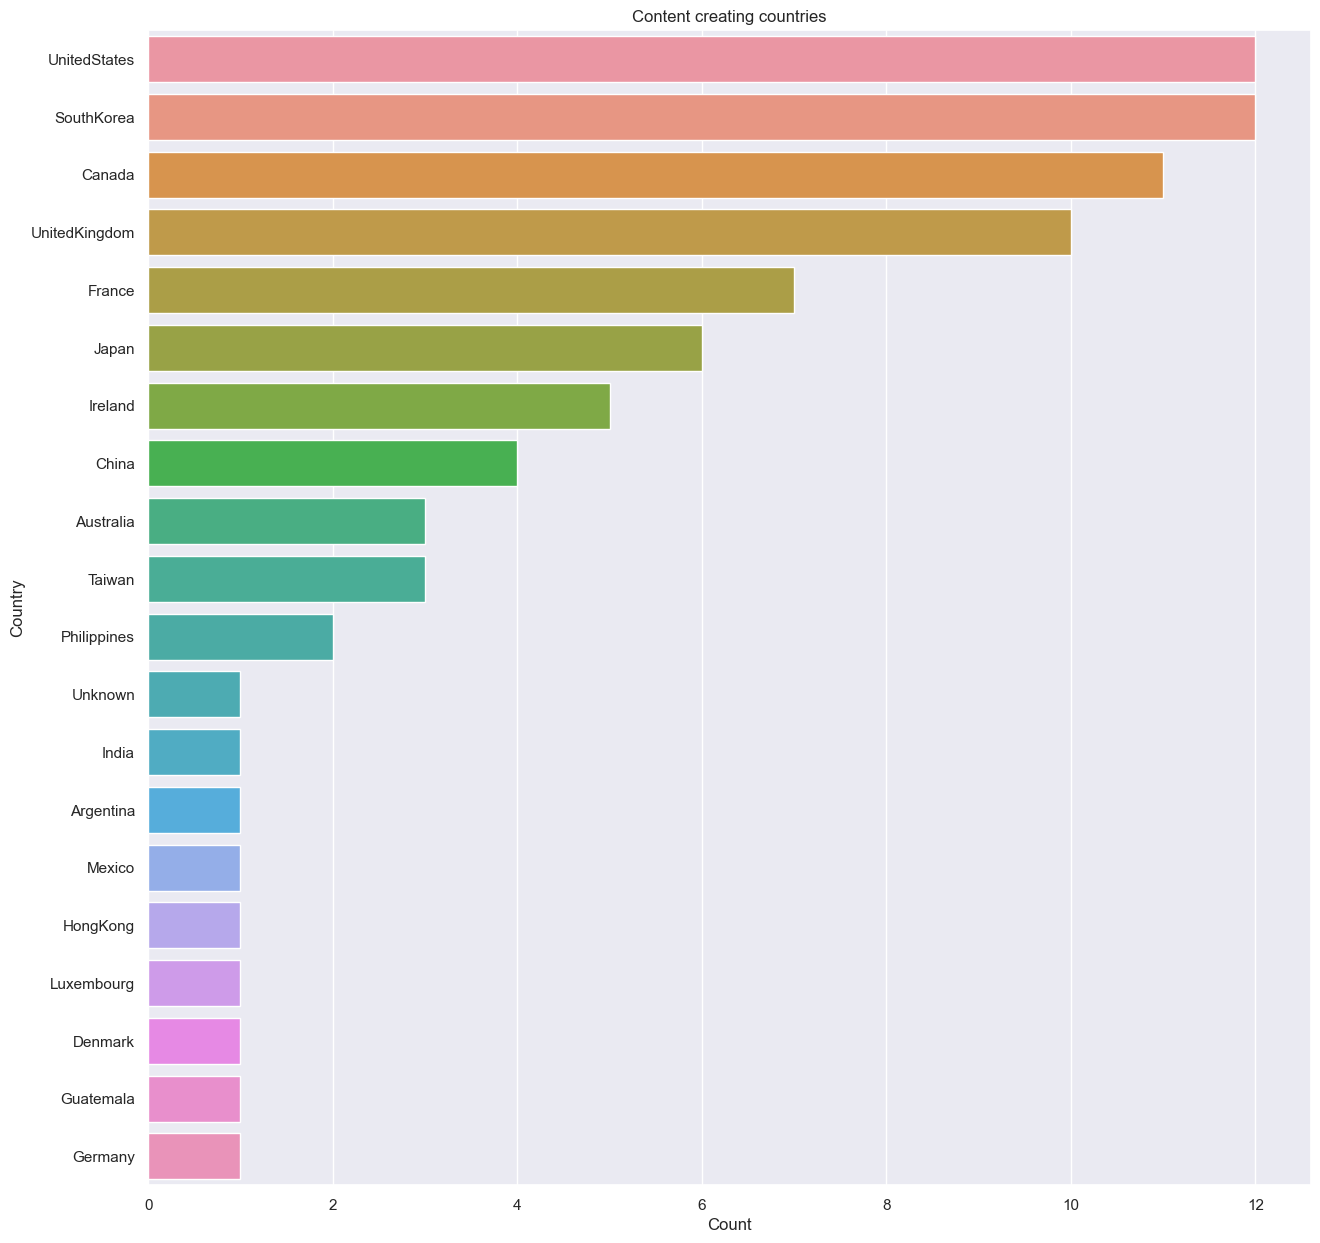

In [68]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

## Create a bar chart using seaborn
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Country")

# Add label for horizontal axis
plt.xlabel("Count")

### Top 10 TV shows with largest number of seasons

In [69]:
# Define the features to select from the DataFrame
features = ['title', 'duration']

# Select the specified features
durations = disney_plus_shows[features].copy()  # Make a copy to avoid modifying the original DataFrame

# Remove ' Season' and 's' from the 'duration' column to extract the number of seasons
durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '').str.replace('s', '')

# Convert the 'no_of_seasons' column to numeric
durations['no_of_seasons'] = pd.to_numeric(durations['no_of_seasons'], errors='coerce')

# Display the DataFrame
print(durations.head())

                        title    duration  no_of_seasons
4       The Beatles: Get Back    1 Season              1
6                     Hawkeye    1 Season              1
7      Port Protection Alaska   2 Seasons              2
8   Secrets of the Zoo: Tampa   2 Seasons              2
13      Dr. Oakley, Yukon Vet  10 Seasons             10


In [70]:
# Convert the 'no_of_seasons' column to integer after ensuring it contains only valid numeric values
durations['no_of_seasons'] = pd.to_numeric(durations['no_of_seasons'], errors='coerce').fillna(0).astype(int)

In [71]:
t = ['title','no_of_seasons']
top = durations[t]

top = top.sort_values(by = 'no_of_seasons', ascending=False)

<Axes: xlabel='title'>

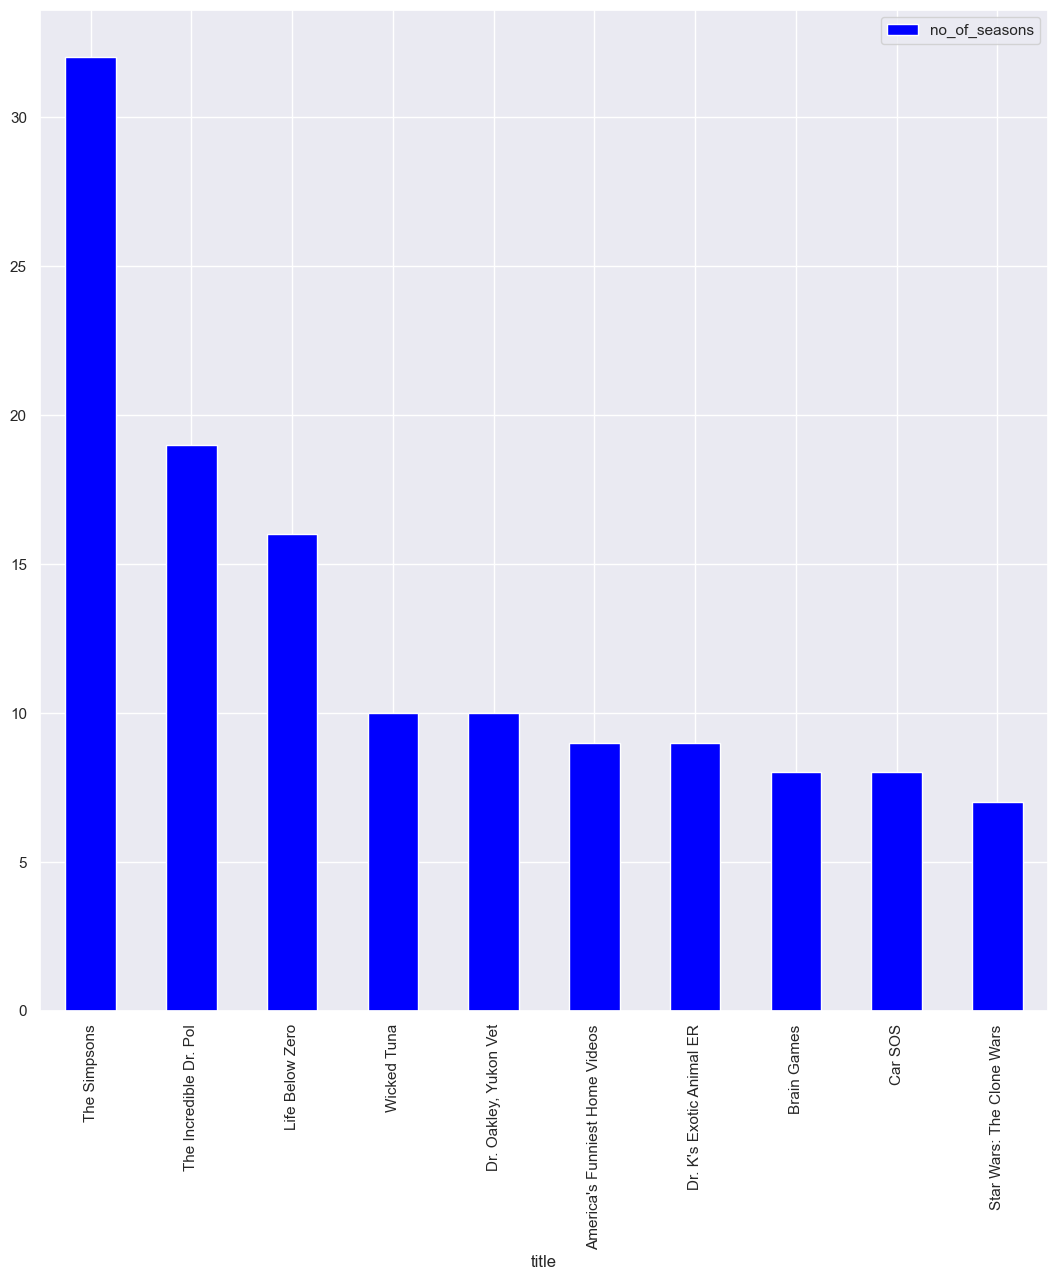

In [72]:
top10=top[0:10]
top10.plot(kind = 'bar',x = 'title',y = 'no_of_seasons', color = 'blue')

### TV Shows with Lowest Number of Seasons

In [73]:
import plotly.graph_objects as go

# Sort the DataFrame based on the 'no_of_seasons' column in ascending order
bottom = top.sort_values(by='no_of_seasons')

# Select the bottom 20 to 50 entries
bottom = bottom.iloc[20:50]

# Create a Plotly Figure for the table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Title', 'No of seasons']),
    cells=dict(values=[bottom['title'], bottom['no_of_seasons']],
               fill_color='lavender'))
])

# Show the Plotly figure
fig.show()

### Wordcloud for Genres

In [46]:
genres = list(disney_plus_shows['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g = Counter(gen)

In [74]:
# Extracting genres from the 'listed_in' column and counting occurrences
gen = []
for genres in disney_plus_shows['listed_in']:
    genres = genres.split(',')
    for genre in genres:
        gen.append(genre.strip())

# Counting occurrences of each genre using Counter
g = Counter(gen)


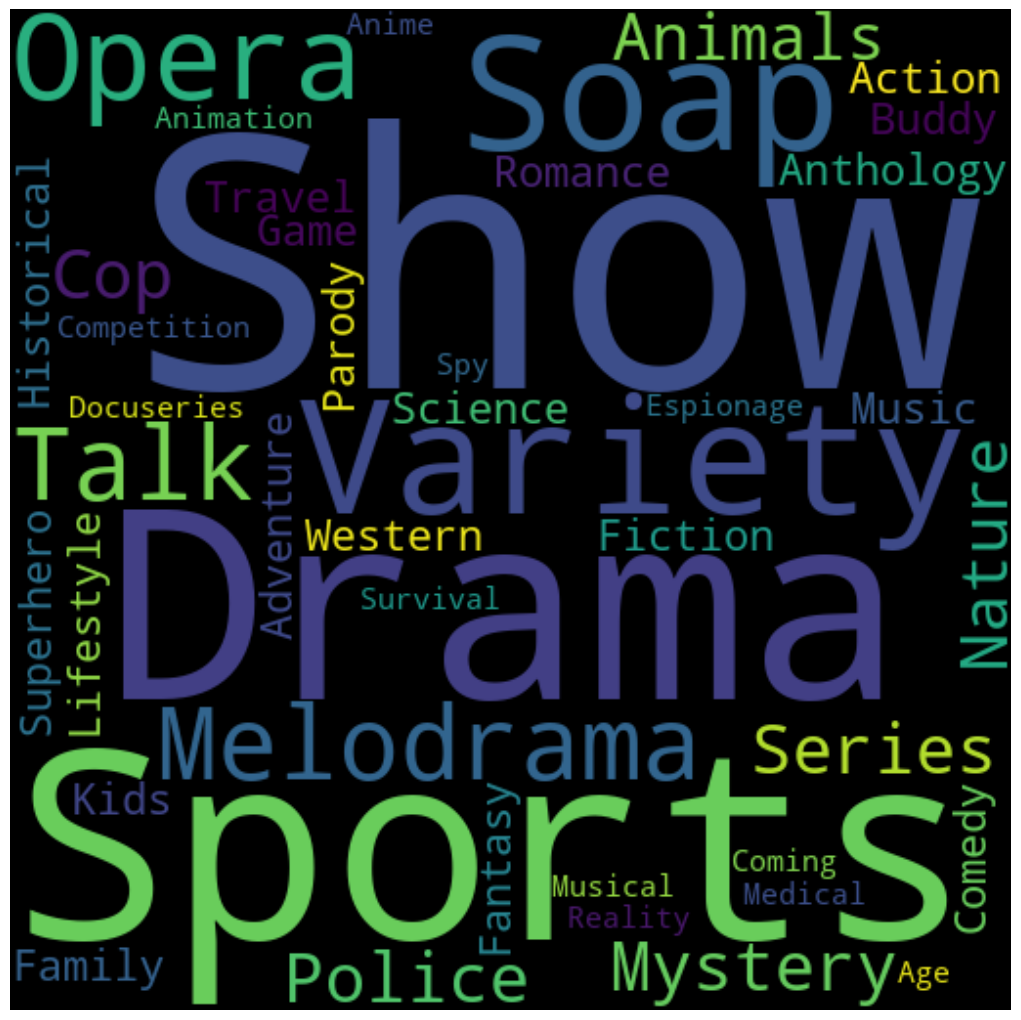

In [76]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Convert list to a string for word cloud generation
text = ' '.join(set(gen))

# Load mask image
mask_path = '/Users/mike/Downloads/upvote1.webp'
try:
    mask = np.array(Image.open(mask_path))
except FileNotFoundError:
    print("Error: Mask image file not found at specified path.")
    mask = None
except Exception as e:
    print("Error:", e)
    mask = None

# Generate word cloud
wordcloud = WordCloud(max_words=1000000, background_color="black", mask=mask).generate(text)

# Plot word cloud
plt.figure(figsize=(13, 13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### Content in the UK

In [77]:
# Filter data for Disney+ content in the United Kingdom
disney_plus_uk = disney_plus_overall[disney_plus_overall['country'] == 'United Kingdom']

# Drop rows with missing values
nannef = disney_plus_uk.dropna()

# Create a treemap visualization
fig = px.treemap(nannef, 
                 path=['country', 'director'],  # Path for the treemap hierarchy
                 color='director',  # Color by director
                 hover_data=['director', 'title'],  # Additional data to show on hover
                 color_continuous_scale='Purples')  # Color scale

# Show the treemap
fig.show()


In [78]:
#get the newest uk series in ascending order from the dataset
newest_uk_series = disney_plus_uk.sort_values(by='release_year', ascending=False)[0:20]
newest_uk_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
353,s354,Movie,from our family to yours,Angela Affinita,NaN,United Kingdom,"November 27, 2020",2020,TV-G,3 min,"Animation, Family",A granddaughter brings joy on Christmas by men...
400,s401,TV Show,magic of disney's animal kingdom,NaN,Josh Gad,United Kingdom,"September 25, 2020",2020,TV-PG,1 Season,"Animals & Nature, Docuseries, Family",Magic of Disney’s Animal Kingdom goes backstag...
422,s423,Movie,back to the titanic,NaN,NaN,United Kingdom,"August 21, 2020",2020,TV-PG,44 min,"Documentary, Historical",Back to the Titanic documents the first manned...
459,s460,Movie,surviving the mount st. helens disaster,Sophie Harris,Bill Ratner,United Kingdom,"July 31, 2020",2020,TV-PG,44 min,"Animals & Nature, Documentary",Eyewitness accounts and rare images chart the ...
407,s408,TV Show,europe from above,NaN,Julian Barratt,United Kingdom,"September 18, 2020",2019,TV-G,1 Season,"Docuseries, Reality",Europe from Above takes to the air over Europe...
1303,s1304,Movie,the lost tomb of alexander the great,Duncan Singh,Matt McFetridge,United Kingdom,"November 12, 2019",2019,TV-PG,44 min,"Documentary, Historical",An archaeologist on the hunt for Alexander the...
613,s614,Movie,viking warrior women,Stuart Strickson,Ella Al-Shamahi,United Kingdom,"February 28, 2020",2019,TV-PG,44 min,"Documentary, Historical",New discoveries challenge everything we though...
542,s543,TV Show,lost treasures of egypt,NaN,Rick Robles,United Kingdom,"May 1, 2020",2018,TV-PG,1 Season,"Docuseries, Historical","An immersive, discovery-led series following t..."
566,s567,TV Show,tut's treasures: hidden secrets,NaN,Mark Bazeley,United Kingdom,"April 10, 2020",2018,TV-PG,1 Season,"Docuseries, Historical",The pharaoh’s priceless grave goods are being ...
661,s662,Movie,drain the sunken pirate city,Sophie Harris,Russell Boulter,United Kingdom,"January 1, 2020",2017,TV-14,48 min,"Documentary, Historical",Hidden beneath Jamaica’s Kingston Harbour lie ...


In [64]:
# Create a Plotly Figure for the table
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_uk_series['title'],newest_uk_series['release_year']]))
                     ])
fig.show()